In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('prefinaloutput.csv')

In [3]:
df.head(50)

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud for Operations,Time,Instrument or Mode_CREDIT-CARD,Instrument or Mode_DEBIT-CARD,Instrument or Mode_WIRE-TRANSFER,type_DEBIT,type_PAYMENT,type_TRANSFER,AML Risk Rating,Type of Account,Sanctions,Date_28,Date_29,Country of Domicile_US
0,0.000121,0.000864,0.000000,0,0,0.939583,1,0,0,0,1,0,0,0,0,1,0,1
1,0.000930,0.001620,0.000000,0,1,0.918056,1,0,0,0,1,0,0,1,0,0,0,0
2,0.055328,0.019373,0.358175,0,1,0.203472,0,0,1,0,0,1,0,1,0,0,1,1
3,0.013412,0.552665,0.846995,0,1,0.530556,0,0,0,0,0,0,2,0,0,1,0,1
4,0.000895,0.001013,0.000000,0,1,0.322917,1,0,0,0,1,0,0,1,0,0,1,1
5,0.000243,0.000427,0.000000,0,0,0.354167,1,0,0,0,1,0,1,0,0,0,0,1
6,0.001011,0.004672,0.000000,0,1,0.791667,1,0,0,0,1,0,2,1,0,0,0,1
7,0.000022,0.007654,0.000000,0,0,0.984722,1,0,0,0,1,0,1,0,0,0,0,1
8,0.010432,0.019373,0.010583,0,1,0.386806,0,0,0,0,0,0,1,0,0,0,0,1
9,0.062700,0.019373,0.247145,0,1,0.856250,0,0,1,0,0,1,0,0,0,0,0,1


In [4]:
X=df.drop('isFraud',axis=1)

In [5]:
X

,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud for Operations,Time,Instrument or Mode_CREDIT-CARD,Instrument or Mode_DEBIT-CARD,Instrument or Mode_WIRE-TRANSFER,type_DEBIT,type_PAYMENT,type_TRANSFER,AML Risk Rating,Type of Account,Sanctions,Date_28,Date_29,Country of Domicile_US
0,0.000121,0.000864,0.000000,0,0.939583,1,0,0,0,1,0,0,0,0,1,0,1
1,0.000930,0.001620,0.000000,1,0.918056,1,0,0,0,1,0,0,1,0,0,0,0
2,0.055328,0.019373,0.358175,1,0.203472,0,0,1,0,0,1,0,1,0,0,1,1
3,0.013412,0.552665,0.846995,1,0.530556,0,0,0,0,0,0,2,0,0,1,0,1
4,0.000895,0.001013,0.000000,1,0.322917,1,0,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.000877,0.004998,0.000000,1,0.056250,1,0,0,0,1,0,0,1,0,0,0,1
995,0.013326,0.193793,0.003701,1,0.050694,0,0,0,0,0,0,1,1,0,0,0,1
996,0.002676,0.002068,0.005572,1,0.995833,0,0,0,0,0,0,2,1,0,0,0,1
997,0.003723,0.010631,0.298527,1,0.349306,0,0,0,0,0,0,0,1,0,0,0,1


In [6]:
y=df['isFraud']

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [8]:
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-0.96201235, -0.47023336, -0.55869341, -0.54528875],
       [-0.71830703, -0.54848174,  0.18092689,  0.42231408],
       [ 0.93026908, -0.8686877 ,  0.73396292,  0.40699991],
       ...,
       [ 1.00081662,  1.12656688,  0.19373739,  0.53937436],
       [ 0.57540244, -0.80854093,  0.4119488 ,  0.4919727 ],
       [ 1.32126537,  1.06403993,  0.20211662,  0.47913645]])

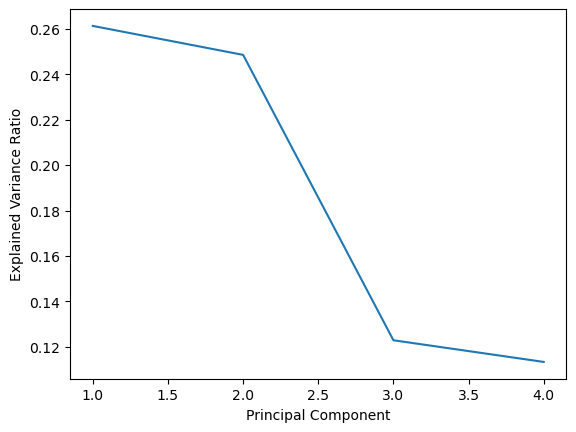

In [9]:
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.25)
svclassifier = SVC(C=1000.0,kernel='poly',gamma= 1,degree=2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[237   3]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       240
           1       0.00      0.00      0.00        10

    accuracy                           0.95       250
   macro avg       0.48      0.49      0.49       250
weighted avg       0.92      0.95      0.93       250



average of f1 score 0.4110357529844322


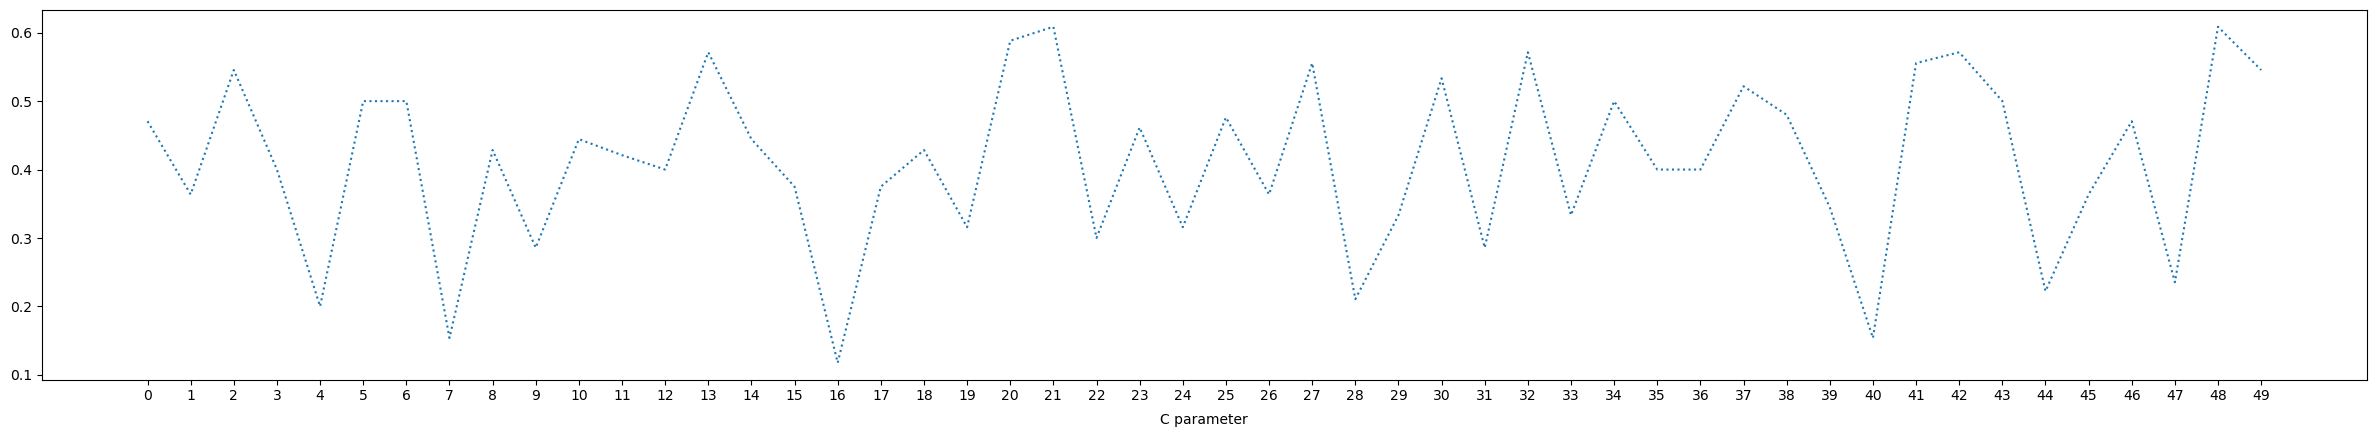

In [11]:
cresult=[]
ci=[]
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.25)
    svclassifier = SVC(C=1000.0,kernel='poly',gamma= 1,degree=2)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    cresult.append(f1_score(y_test,y_pred))
    ci.append(j)

print("average of f1 score "+str(np.mean(cresult)))
plt.figure().set_figwidth(30)
plt.plot(cresult, linestyle = 'dotted')
plt.xticks(range(len(ci)), ci)
plt.xlabel("C parameter", labelpad=7)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,stratify=y, test_size = 0.25)
svclassifier = SVC(C=1000.0,kernel='poly',gamma= 1,degree=2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[240   0]
 [ 10   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       240
           1       0.00      0.00      0.00        10

    accuracy                           0.96       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.92      0.96      0.94       250



C:\Users\hfcpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hfcpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hfcpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 average of f1 score 0.0


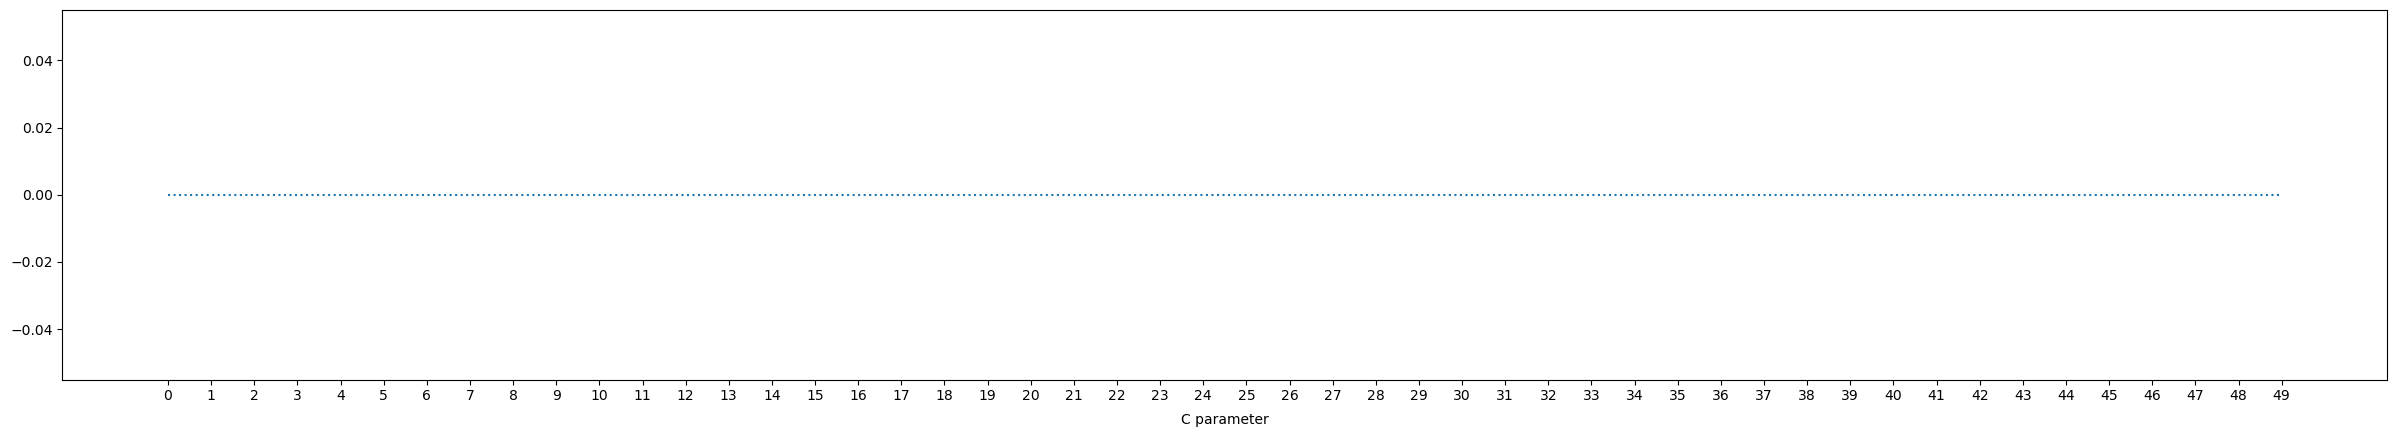

In [13]:
cresult=[]
ci=[]
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y,stratify=y, test_size = 0.25)
    svclassifier = SVC(C=1000.0,kernel='poly',gamma= 1,degree=2)
    svclassifier.fit(X_train, y_train)
    print(j,end=" ")
    y_pred = svclassifier.predict(X_test)
    cresult.append(f1_score(y_test,y_pred))
    ci.append(j)

print("average of f1 score "+str(np.mean(cresult)))
plt.figure().set_figwidth(30)
plt.plot(cresult, linestyle = 'dotted')
plt.xticks(range(len(ci)), ci)
plt.xlabel("C parameter", labelpad=7)
plt.show()